In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [2]:
def process_fact_text(fact_text):
    processed_facts = ""
    for line in fact_text.splitlines():
        # print("testt", line)
        if len(processed_facts) > 3000:
            break

        if sum(c.isalpha() for c in line) < 30 or not any(c.islower() for c in line):
            continue

        processed_facts += line + "\n"

    return processed_facts

In [3]:
filename = "../datasets/data_confonet_2020.csv"
df = pd.read_csv(filename)

facts_list = []
for index, row in df.iterrows():
    processed_fact = process_fact_text(row['Fact Text'])

    if len(facts_list) > 0 and processed_fact == facts_list[-1]:
        continue
    
    facts_list.append(processed_fact)

In [4]:
ignore_words = ['Complainant', 'complainant', 'appellant', 'petitioner', 'respondent', 'complaint', 'opposition', 'op', 'rs']
my_stop_words = ENGLISH_STOP_WORDS.union(ignore_words)

vectorizer = TfidfVectorizer(stop_words=my_stop_words)


In [5]:
X = vectorizer.fit_transform(facts_list)

X

<972x12790 sparse matrix of type '<class 'numpy.float64'>'
	with 137506 stored elements in Compressed Sparse Row format>

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [56]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=20)
model.fit(X)

KMeans(n_clusters=6, n_init=20)

In [57]:
labels=model.labels_
values, counts = np.unique(labels, return_counts=True)

print(values)

print(counts)

[0 1 2 3 4 5]
[ 39  60 193 162 191 327]


Cluster: 0 count: 39


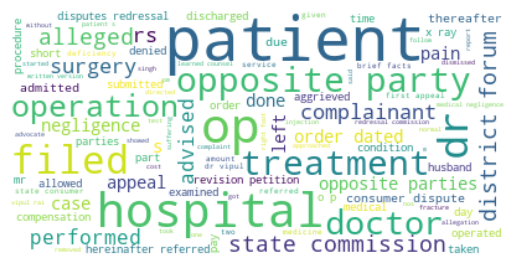

Cluster: 1 count: 60


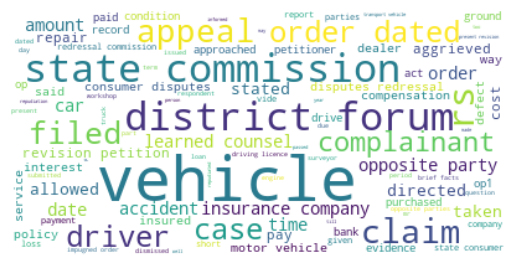

Cluster: 2 count: 193


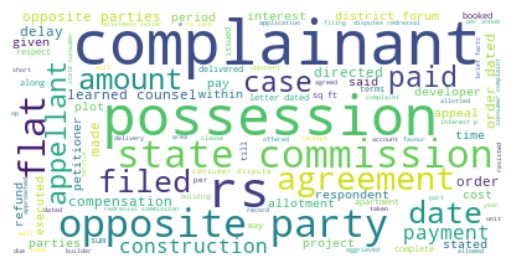

Cluster: 3 count: 162


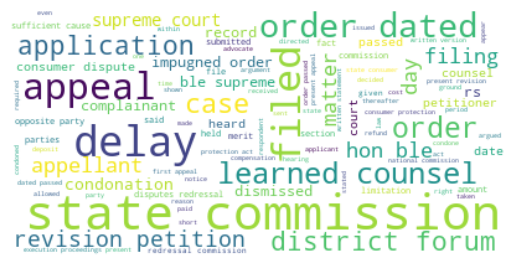

Cluster: 4 count: 191


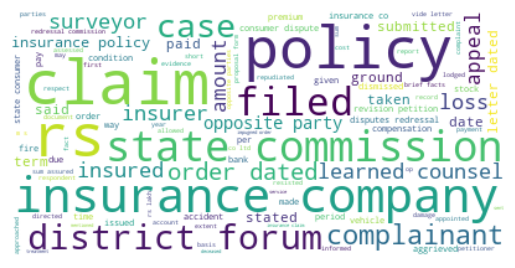

Cluster: 5 count: 327


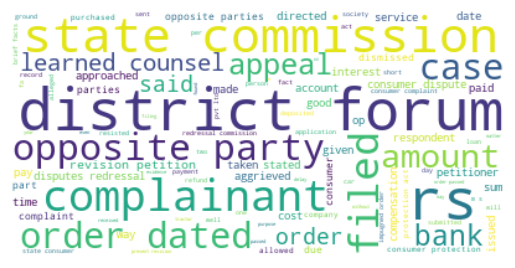

In [58]:
from wordcloud import WordCloud

result={'cluster':labels,'facts':facts_list}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['facts'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split() if word not in ignore_words ])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {} count: {}'.format(k, counts[k]))

   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [70]:
result[result.cluster==5].iloc[3]['facts']

'1.     The Complainant, Resham Bhargava, about 27 years of age (hereinafter referred to as ‘the patient’) during her first pregnancy visited Mata Chanan Hospital – O.P. No. 1 at New Delhi.  The O.P. No. 3 – Dr. Seema Saxena, Gynaecologist examined her and advised her for regular antenatal check-up (ANC). Her periodic blood tests and ultrasound were performed and the reports were found normal.  On 10.07.2016, O.P. No. 3 admitted the patient in O.P. No. 1 hospital.  On the next day at 11.15 a.m. O.P. No. 3 Dr. Seema Saxena told her that due to presence of bone in delivery pathway, normal delivery was not possible and therefore she needs surgical delivery (Lower Segment Caesarean Section – ‘LSCS’).  It came as a mere shock to the patient, but O.P. Nos. 2 & 3 forced the patient to undergo LSCS under false impression of danger to the unborn child.  Thus, unwillingly the patient herself and her husband agreed for LSCS and signed some papers under force of O.P. Nos. 2 & 3.  The baby girl was

In [71]:
test_fact = ["1.     The Complainant, Resham Bhargava, about 27 years of age (hereinafter referred to as ‘the patient’) during her first pregnancy visited Mata Chanan Hospital – O.P. No. 1 at New Delhi.  The O.P. No. 3 – Dr. Seema Saxena, Gynaecologist examined her and advised her for regular antenatal check-up (ANC). Her periodic blood tests and ultrasound were performed and the reports were found normal.  On 10.07.2016, O.P. No. 3 admitted the patient in O.P. No. 1 hospital.  On the next day at 11.15 a.m. O.P. No. 3 Dr. Seema Saxena told her that due to presence of bone in delivery pathway, normal delivery was not possible and therefore she needs surgical delivery (Lower Segment Caesarean Section – ‘LSCS’).  It came as a mere shock to the patient, but O.P. Nos. 2 & 3 forced the patient to undergo LSCS under false impression of danger to the unborn child.  Thus, unwillingly the patient herself and her husband agreed for LSCS and signed some papers under force of O.P. Nos. 2 & 3.  The baby girl was delivered by LSCS.  However, while shifting the patient from operation theatre to the ward, the patient experienced severe pain, weakness and blurred vision. Same was informed to O.P. No. 3 – Dr. Seema Saxena, who assured that everything was normal and there was nothing to worry.  After few minutes the patient was unable to breath and immediately O.P. No. 3 doctor was called who examined the patient and told her husband that such condition might be due to bleeding inside and there was need to open the abdomen again. Therefore, the husband of the complainant had signed some documents and within 15 minutes the critical patient was operated by O.P. No. 3. The operation consumed several hours, but her husband was kept in dark about the happenings. It was when the patient’s husband threatened to take legal action against the Opposite Parties, only then the doctor disclosed that uterus of the patient was removed and approx. 1.5 litres of blood was present in the abdomen. It was alleged that patient was operated with the help of more than 10 doctors. After the second surgery the patient was kept in ICU from 11.07.2016 to 17.07.2016.  The patient paid a huge amount of Rs. 2,10,000/- towards the medical bills.  The complainant / patient alleged that due to removal of the uterus, she lost her chance to give birth to a child in future and it was due to carelessness and gross negligence of the Opposite Parties.  She filed a complaint against the Opposite Parties and prayed for compensation of Rs. 1,10,00,000/-.\n2.     Heard the learned counsel for all the parties.  Perused the material on record.\n3.     The dispute relates to the alleged medical negligence and the two main allegations against the OPs are that i) whether LSCS was performed hastily without consent and ii) whether hysterectomy was caused due to the carelessness of the opposite parties.\n4.     Discussion on “i) whether LSCS was performed hastily without consent”:\nThe patient during ANC period was under observation of O.P. Nos. 2 & 3 at O.P. No. 1 hospital.  As per the initial assessment and plan the expected date of delivery was 11.07.2016.  The periodic ANC follow-up with blood and Ultra Sonography (USG) investigations were normal.  On careful perusal of the medical record, the final diagnosis was “Primi gravida at 38 weeks + 4 days POG with Intrahepatic Cholestasis of pregnancy (IHCP) with mildly deranged LFT”. Therefore, because of IHCP, the patient was admitted for the induction of labour. On examination the cervix was uneffaced, vertex at -3, therefore, Cerviprime gel was instilled and augmentation of labour was done with Syntocinon drip but there was no improvement in bishops score. The induction of labour was not successful, therefore after informed consent LSCS, was performed. Thus, the allegation about hasty decision to perform LSCS is not sustainable.\n"]

model.predict(vectorizer.transform(test_fact))

array([5])